In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


import seaborn as sns
sns.set_style("whitegrid")

def graficar_codo(data, k_max):
    """
    Calcula y grafica la inercia para k entre 2 y k_max.
    
    Parámetros:
    - data: Datos
    - k_max: Valor máximo de k a probar.
    """
    inercias = []
    rango_k = range(2, k_max + 1)

    for k in rango_k:
        # Inicializamos KMeans con k clusters
        kmeans = KMeans(n_clusters=k, n_init='auto', random_state=19)
        # Ajustamos el modelo a los datos
        kmeans.fit(data)
        # Guardamos la inercia
        inercias.append(kmeans.inertia_)

    # Graficamos
    plt.figure(figsize=(8, 5))
    plt.plot(rango_k, inercias, marker='o', linestyle='--')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters (k)')
    plt.ylabel('Inercia')
    plt.xticks(rango_k)
    plt.show()

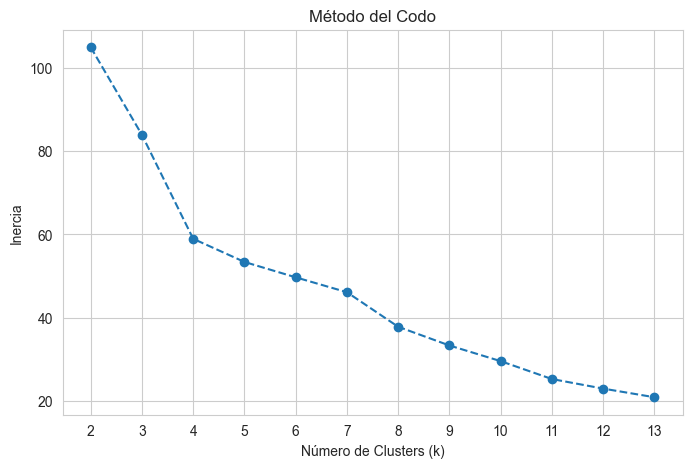

In [8]:
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler

# dataset_usarrests = sm.datasets.get_rdataset("USArrests", "datasets").data
# me estaba fallando descargarlo desde statsmodels
dataset_usarrests = pd.read_csv("USArrests.csv", index_col=0)

scaler = StandardScaler()
datos_escalados = scaler.fit_transform(dataset_usarrests)

graficar_codo(datos_escalados, k_max=13)



Viendo el grafico se observa que el valor optimo (el codo) es 4.

In [3]:
# Elejo k=4
k_elegido = 4
kmeans_final = KMeans(n_clusters=k_elegido, random_state=19, n_init=10)
labels = kmeans_final.fit_predict(datos_escalados)

# Agregar los clusters al DataFrame original
dataset_usarrests['Cluster'] = labels

# Mostrar los estados por cluster
for i in range(k_elegido):
    estados = dataset_usarrests[dataset_usarrests['Cluster'] == i].index.tolist()
    print(f"\n--- Cluster {i} ({len(estados)} estados) ---")
    print(", ".join(estados))


--- Cluster 0 (16 estados) ---
Connecticut, Delaware, Hawaii, Indiana, Kansas, Massachusetts, New Jersey, Ohio, Oklahoma, Oregon, Pennsylvania, Rhode Island, Utah, Virginia, Washington, Wyoming

--- Cluster 1 (8 estados) ---
Alabama, Arkansas, Georgia, Louisiana, Mississippi, North Carolina, South Carolina, Tennessee

--- Cluster 2 (13 estados) ---
Alaska, Arizona, California, Colorado, Florida, Illinois, Maryland, Michigan, Missouri, Nevada, New Mexico, New York, Texas

--- Cluster 3 (13 estados) ---
Idaho, Iowa, Kentucky, Maine, Minnesota, Montana, Nebraska, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin


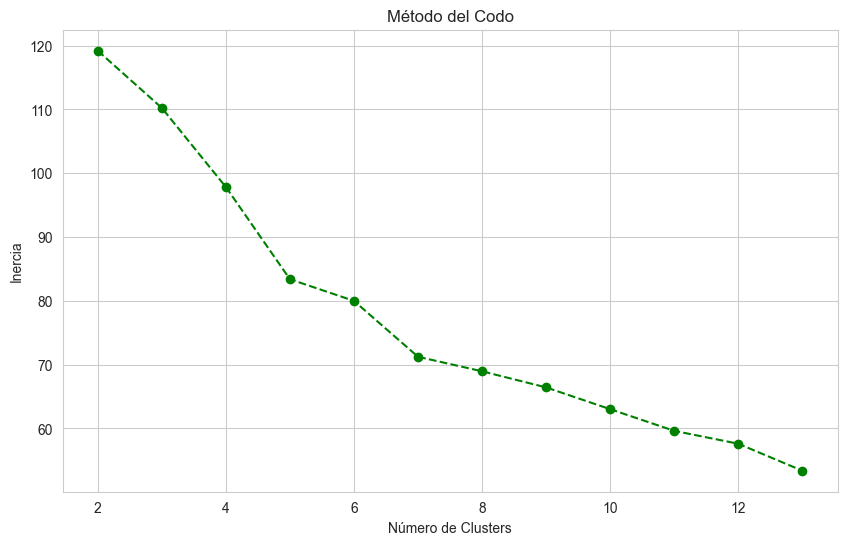

In [5]:
import setuptools
from sklearn_extra.cluster import KMedoids

# Función de Codo con PAM
def graficar_codo_pam(datos, max_k):
    """
    Calcula y grafica la inercia para PAM.
    
    Parámetros:
    - data: Datos
    - k_max: Valor máximo de k a probar.
    """
    inercias = []
    rango_k = range(2, max_k + 1)
    
    for k in rango_k:
        kmedoids = KMedoids(n_clusters=k, metric='manhattan', random_state=19, init='k-medoids++')
        kmedoids.fit(datos)
        inercias.append(kmedoids.inertia_)
        
    plt.figure(figsize=(10, 6))
    plt.plot(rango_k, inercias, marker='o', linestyle='--', color='green')
    plt.title('Método del Codo')
    plt.xlabel('Número de Clusters')
    plt.ylabel('Inercia')
    plt.grid(True)
    plt.show()

# Corro la funcion 
graficar_codo_pam(datos_escalados, 13)

Nuevamente vemos un "codo" en k=4, aunque mas sutil que en el caso de Kmeans. 

In [6]:
# Selecciono k=4 para PAM
k_pam = 4 
pam_final = KMedoids(n_clusters=k_pam, metric='manhattan', random_state=42, init='k-medoids++')
labels_pam = pam_final.fit_predict(datos_escalados)

# Muestro los cluster asi comparo con Kmeans
dataset_usarrests['Cluster_PAM'] = labels_pam
for i in range(k_pam):
    estados = dataset_usarrests[dataset_usarrests['Cluster_PAM'] == i].index.tolist()
    print(f"\n--- Grupo PAM {i} ({len(estados)} estados) ---")
    print(", ".join(estados))


--- Grupo PAM 0 (6 estados) ---
Connecticut, Hawaii, Massachusetts, New Jersey, Rhode Island, Utah

--- Grupo PAM 1 (16 estados) ---
Arkansas, Colorado, Delaware, Indiana, Kansas, Kentucky, Missouri, Montana, Nebraska, Ohio, Oklahoma, Oregon, Pennsylvania, Virginia, Washington, Wyoming

--- Grupo PAM 2 (10 estados) ---
Idaho, Iowa, Maine, Minnesota, New Hampshire, North Dakota, South Dakota, Vermont, West Virginia, Wisconsin

--- Grupo PAM 3 (18 estados) ---
Alabama, Alaska, Arizona, California, Florida, Georgia, Illinois, Louisiana, Maryland, Michigan, Mississippi, Nevada, New Mexico, New York, North Carolina, South Carolina, Tennessee, Texas
